In [382]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


In [383]:
df = pd.read_csv("placement.csv")
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [384]:
df.shape

(100, 3)

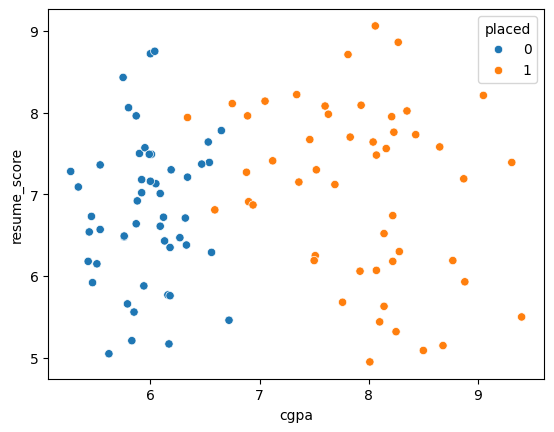

In [385]:
sns.scatterplot(data=df,x=df['cgpa'],y=df['resume_score'],hue=df['placed']);

In [386]:
print("Data shape:", df.shape)
print("Data head:\n", df.head())
print("Target distribution:\n", df['placed'].value_counts())

Data shape: (100, 3)
Data head:
    cgpa  resume_score  placed
0  8.14          6.52       1
1  6.17          5.17       0
2  8.27          8.86       1
3  6.88          7.27       1
4  7.52          7.30       1
Target distribution:
 placed
1    50
0    50
Name: count, dtype: int64


In [387]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [388]:
def step(z):
    if z >0:
        return 1
    else:
        return 0

In [389]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [390]:
intercept_,coef_ = perceptron(X,y)

In [391]:
print("intercepts",intercept_)
print("Coefficient",coef_)

intercepts -0.09999999999999987
Coefficient [ 2.11  -2.588]


In [392]:
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

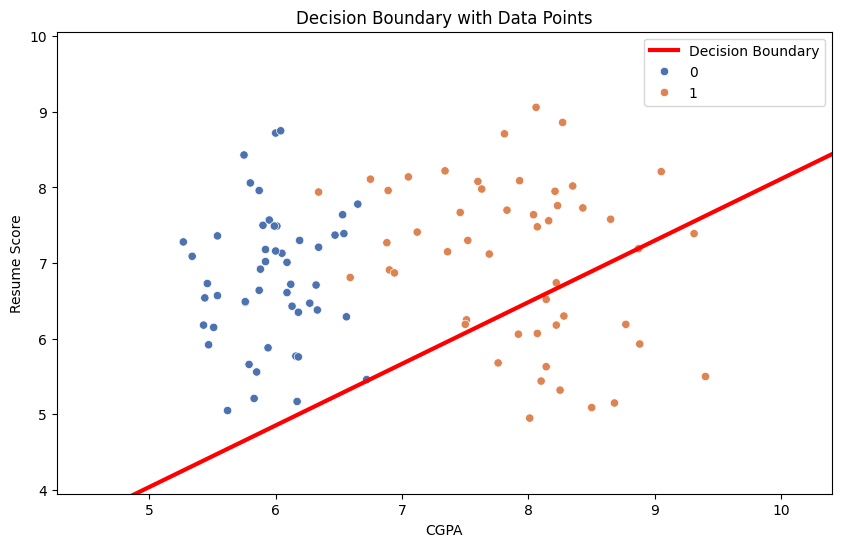

In [393]:
# Step 1: Create x input values for the decision boundary
x_input = np.linspace(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1, 100)  # Use scaled data
y_input = m * x_input + b

# Step 2: Create a figure for the plot
plt.figure(figsize=(10, 6))

# Step 3: Plot the decision boundary
plt.plot(x_input, y_input, color='red', linewidth=3, label='Decision Boundary')

# Step 4: Use seaborn to scatter plot the data points
sns.scatterplot(data=df, x='cgpa', y='resume_score', hue='placed', palette='deep')

# Step 5: Set limits and labels
plt.ylim(df['resume_score'].min() - 1, df['resume_score'].max() + 1)  # Adjust limits based on your data
plt.xlim(df['cgpa'].min() - 1, df['cgpa'].max() + 1)  # Adjust limits based on your data
plt.xlabel('CGPA')
plt.ylabel('Resume Score')
plt.title('Decision Boundary with Data Points')
plt.legend()

# Step 6: Show the plot
plt.show()